This notebook shows how to generate the benchmark plots used in the paper. 

To generate the plots using the benchmarks of the original paper, download the following gist:

[stavros11/ffb88a5b914b60213515f0256c0e8aa4](https://gist.github.com/stavros11/ffb88a5b914b60213515f0256c0e8aa4)

copy the contents in a folder named `/data` in the directory of this notebook and execute all cells.

The logs provided in the gist serve as a template.
The same plotting functionality should work with logs generated from different machines.
To generate new logs from scratch one can use the bash scripts provided in the `scripts/` directory.

In [2]:
from utils import load_data, load_evolution_data

save = False # if ``True`` plots will be saved in the current directory as pdfs

## Figure 2

Bar plot with import breakdown and dry run vs simulation comparison for qibojit.

In [ ]:
from barplots import plot_breakdown_nqubits

data = load_data(f"./data/qibojit_breakdown.dat")
plot_breakdown_nqubits(data, "supremacy", save=save)

## Figure 3

Scaling plots of execution time as a function of the number of qubits for all qibo backends.

In [ ]:
from scaling import plot_scaling

cpu_data = load_data("./data/qibo_scaling_cpu.dat")
gpu_data = load_data("./data/qibo_scaling_gpu.dat")

plot_scaling(cpu_data, gpu_data, "qft", "total_dry_time", legend=False, save=save)
plot_scaling(cpu_data, gpu_data, "qft", "total_simulation_time", save=save)

## Figure 4

qibojit backend performance on different CPU and GPU devices.

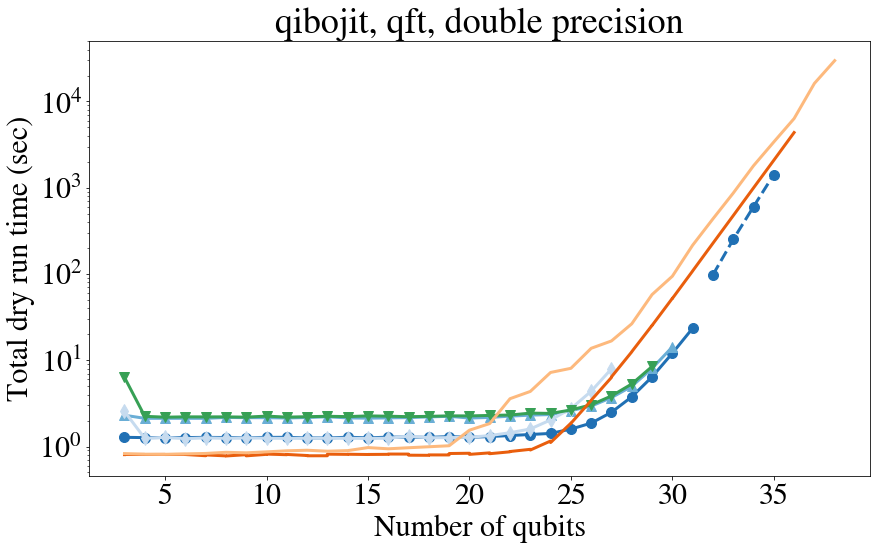

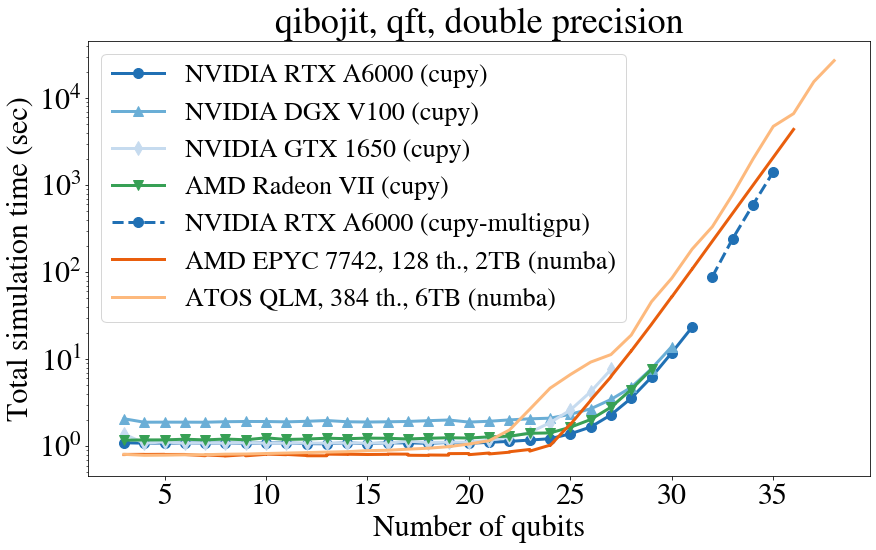

In [4]:
import seaborn as sns # used for color palettes
from devices import Line, plot_devices

oranges = sns.color_palette("Oranges", 2)
greens = sns.color_palette("Greens", 2)
blues = sns.color_palette("Blues", 3)

lines = [
    Line("NVIDIA RTX A6000 (cupy)", load_data("./data/qibo_scaling_gpu.dat", qibojit_only=True), blues[2], "o"),
    Line("NVIDIA DGX V100 (cupy)", load_data("./data/dgx_qibojit.dat", qibojit_only=True), blues[1], "^"),
    Line("NVIDIA GTX 1650 (cupy)", load_data("./data/gtx1650_qibojit.dat", qibojit_only=True), blues[0], "d"),
    Line("AMD Radeon VII (cupy)", load_data("./data/rocm_qibojit.dat"), greens[1], "v"),
    Line("NVIDIA RTX A6000 (cupy-multigpu)", load_data("./data/rtx_multigpu.dat", qibojit_only=True), blues[2], "o", linestyle="--"),
    Line("AMD EPYC 7742, 128 th., 2TB (numba)", load_data("./data/qibo_scaling_cpu.dat", qibojit_only=True), oranges[1], ""),
    Line("ATOS QLM, 384 th., 6TB (numba)", load_data("./data/qlm_qibojit.dat", qibojit_only=True), oranges[0], ""),
]
# filter qibojit-cupy only data if the log file contains more (eg. qibojit-cuquantum)
is_cupy = lines[0].data["library_options"].apply(lambda x: "cupy" in x)
lines[0].data = lines[0].data[is_cupy == True]

plot_devices(lines, "qft", "total_dry_time", save=save)
plot_devices(lines, "qft", "total_simulation_time", legendfont=26, save=save)

## Figure 5

Bar plot with different multigpu configurations and qibojit vs qibotf comparison.

In [ ]:
from barplots import plot_multigpu

data = load_data("./data/dgx_multigpu.dat")
plot_multigpu(data, 32, "total_dry_time", save=save)
plot_multigpu(data, 32, "total_simulation_time", legend=True, save=save)

## Figure 6

Bar plot with comparisons between different simulation libraries on various circuits.

In [ ]:
import seaborn as sns
from libraries import Library, plot_libraries

cpu_data = load_data("./data/libraries_cpu.dat")
gpu_data = load_data("./data/libraries_gpu.dat")

palette = sns.color_palette("bright", 7)
libraries = [
    Library("qibo", palette[0], "/", "Qibo"),
    Library("qibo GPU", palette[0], "/", "Qibo GPU"),
    Library("qiskit", palette[1], "-", "Qiskit"),
    Library("qiskit-gpu GPU", palette[1], "-", "Qiskit GPU"),
    Library("qulacs", palette[2], "\\", "Qulacs", has_single=False),
    Library("qulacs-gpu GPU", palette[2], "\\", "Qulacs GPU", has_single=False),
    Library("qsim", palette[2], "\\", "qsim", has_double=False),
    Library("hybridq", palette[4], "x", "HybridQ"),
    Library("hybridq-gpu GPU", palette[4], "x", "HybridQ GPU"),
    Library("projectq", palette[3], "o", "ProjectQ", has_single=False),
    Library("qcgpu GPU", palette[3], "o", "QCGPU", has_double=False)
]

plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 20, precision="single", legend=False, save=save)
plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 30, precision="single", legend=True, save=save)

plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 20, precision="double", legend=False, save=save)
plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 30, precision="double", legend=True, save=save)

## Figure 7 

Scaling plot vs time dt for adiabatic evolution of TFIM Hamiltonian using the dense form.

In [ ]:
from evolution import plot_dense

data = load_evolution_data("data/evolution.dat")
plot_dense(data, "total_dry_time", 10, save=save)

## Figure 8

Scaling plot vs time dt for adiabatic evolution of TFIM Hamiltonian using the Trotter decomposition.

In [ ]:
from evolution import plot_trotter

data = load_evolution_data("data/evolution.dat")
plot_trotter(data, "total_dry_time", 10, save=save)
plot_trotter(data, "total_dry_time", 20, legend=True, save=save)